<a href="https://colab.research.google.com/github/BoomerPython/Week_4/blob/main/DSA_BoomerPython_Week4_ChartBasics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
# Basic examples of plotting and annotating charts
# Based on McKinney (2018)

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

# The Basic Plot

In [ ]:
data = np.arange(10)
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

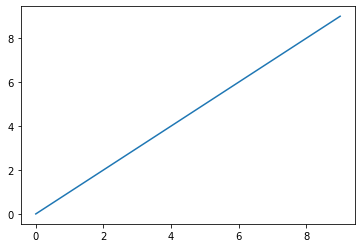

In [ ]:
plt.plot(data)


# Creating Sub Plots

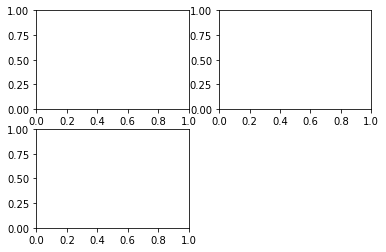

In [ ]:
# Plots in matplotlib reside within a Figure object
# Lets re-create Fig 9-2 from the text

fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)

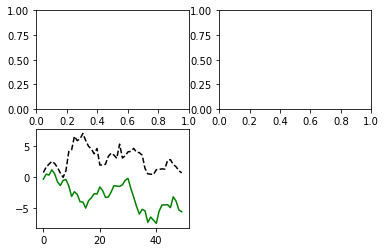

In [ ]:
# To re-create Fig 9-3, we will need to repeat the code and 
# add the specific plot to the lower left subplot

fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
plt.plot(np.random.randn(50).cumsum(), 'k--')
#plt.plot(np.random.randn(50).cumsum(), '-g')

# the 'k--' is a style option - plot a black dashed line
# trying the '-g' will result in a green solid line
# being added to the lower left subplot

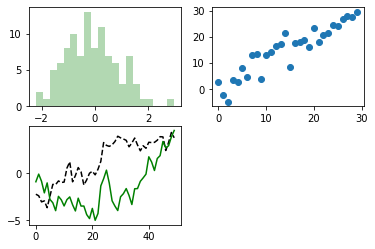

In [ ]:
# To create a variation of Fig 9-4, we will need to repeat the code and 
# add the specific plots to the appropriate subplots

fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
plt.plot(np.random.randn(50).cumsum(), 'k--')
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))
_ = ax1.hist(np.random.randn(100), bins=20, color='g', alpha=0.3)
plt.plot(np.random.randn(50).cumsum(), '-g')

# Colors, markers, and line styles

In [ ]:
# Covering all options available is beyond the scope of this noteboook
# Be sure to check out https://matplotlib.org/ or https://sourceforge.net/projects/matplotlib/

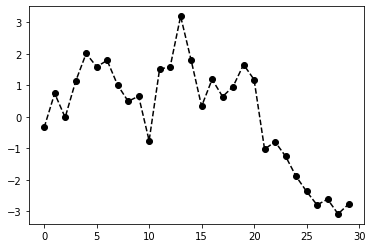

In [ ]:
# Plotting black dashed lines with solid circle marker

plt.plot(np.random.randn(30).cumsum(), color='k', linestyle='dashed', marker='o')

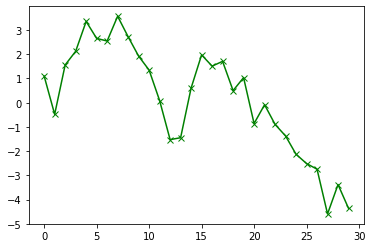

In [ ]:
# Plotting green solid lines with X marker

plt.plot(np.random.randn(30).cumsum(), color='g', linestyle='solid', marker='x')

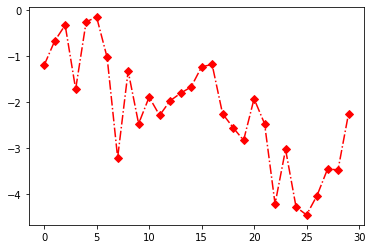

In [ ]:
# Plotting red dashed-dotted lines with diamond marker

plt.plot(np.random.randn(30).cumsum(), color='r', linestyle='dashdot', marker='D')

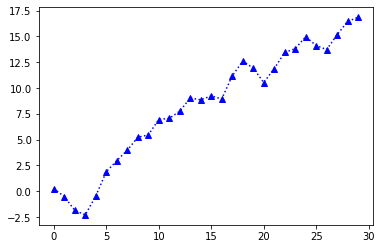

In [ ]:
# Plotting blue dotted lines with solid triangle marker

plt.plot(np.random.randn(30).cumsum(), color='b', linestyle='dotted', marker='^')

# Labels & Legends

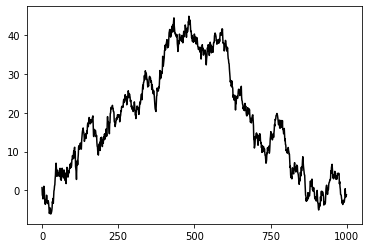

In [ ]:
# Plotting black dashed lines with solid circle marker

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(np.random.randn(1000).cumsum(), color='k', linestyle='solid')


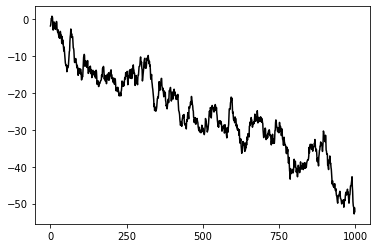

In [ ]:
# We can adjust the ticks rather than accepting the default

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(np.random.randn(1000).cumsum(), color='k', linestyle='solid')
ticks = ax.set_xticks([0,250,500,750,1000])

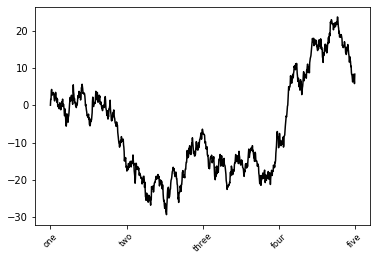

In [ ]:
# We can even label the ticks with words versus numbers

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(np.random.randn(1000).cumsum(), color='k', linestyle='solid')
ticks = ax.set_xticks([0,250,500,750,1000]) # this will force the ticks to five supporting the below ticklabels
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                            rotation=45, fontsize='small')


Text(0.5, 0, 'Stages')

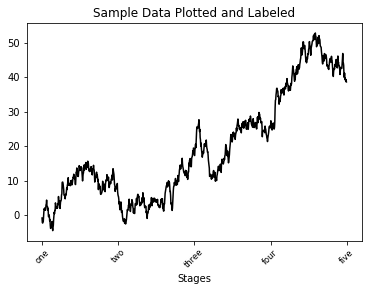

In [ ]:
# But what we really want is labels & titles correct?

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(np.random.randn(1000).cumsum(), color='k', linestyle='solid')
ticks = ax.set_xticks([0,250,500,750,1000]) # this will force the ticks to five supporting the below ticklabels
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                            rotation=45, fontsize='small')
ax.set_title('Sample Data Plotted and Labeled')
ax.set_xlabel('Stages')

In [2]:
!pip install yfinance

     |████████████████████████████████| 6.3MB 4.7MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23919 sha256=94851199c18e4fc1171ab1da955520aca51cc4bc91aa56c5af2ba930543c2d24
  Stored in directory: /root/.cache/pip/wheels/fe/a0/79/b73d4a0c535b421b88fc7b393936b371fabbfeaf979eca4050
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
# But what is we want to compare multiple plots/datasets?  Like stock prices?
# Well that is a little more work but lets give it a shot
# As seen above we will need to install yahoo finance
# Based on example from Dantoudai (2020)

import pandas as pd
import yfinance



In [5]:
# Creating a function to leverage Yahoo Finance
 
def download_stock_data(Stocks, start_date, end_date):
    """
    Wrapper function for yfinance.download()
 
    Inputs
    ------
    Stocks: list
        list of stocks to download from Yahoo finance
    start_date: datetime
        start date to download
    end_date: datetime
        end date to download
 
    Returns
    -------
    stocks: pd.DataFrame
        pd.DataFrame of stock data
    """
    # The downloaded stock data has the columns:
    # "Stock", "Open", "High", "Low", "Close", "Adj Close", "Volume"
    want = ["Stock", "Open", "High", "Low", "Close", "Adj Close", "Volume"]
    stocks = pd.DataFrame(columns = want)
    for i in Stocks:  
        print("Downloading:", i)
        stock = yfinance.download(i, start = start_date, end = end_date)
        # reset index to force the index to become "Date"
        stock = stock.reset_index()
        # add the stock's name into the data
        stock["Stock"] = i
        stocks = pd.concat([stocks, stock])  
    # re-arrange the columns as follows:
    want = ["Stock", "Date", "Open", "High", "Low", "Close", "Adj Close", "Volume"]
    stocks = stocks[want] 
    return stocks

In [27]:
# OBTAIN - Get data for three auto stocks

start = '2020-01-01'
end = '2020-12-31'
stonk1 = ["TSLA"]
stonk2 = ["F"]
stonk3 = ["GM"]
data1 = download_stock_data(stonk1, start, end)
data2 = download_stock_data(stonk2, start, end)
data3 = download_stock_data(stonk3, start, end)
#data2.head()


Downloading: TSLA
[*********************100%***********************]  1 of 1 completed
Downloading: F
[*********************100%***********************]  1 of 1 completed
Downloading: GM
[*********************100%***********************]  1 of 1 completed


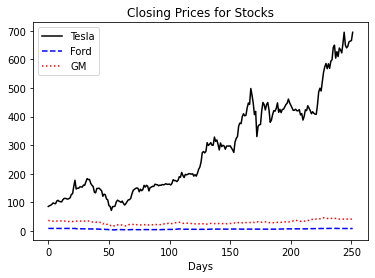

In [28]:
# EXPLORE - Plot closing stock prices for 2020

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(data1['Close'], color='k', linestyle='solid', label='Tesla')
ax.plot(data2['Close'], color='b', linestyle='dashed', label='Ford')
ax.plot(data3['Close'], color='r', linestyle='dotted', label='GM')
ax.set_title('Closing Prices for Stocks')
ax.set_xlabel('Days')
ax.legend(loc='best')

Hmmm...
That is not really helpful
Let us throw in an OK company to the mix


Downloading: WMB
[*********************100%***********************]  1 of 1 completed


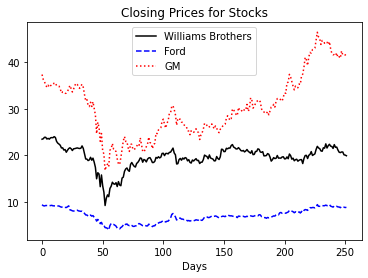

In [31]:
# EXPLORE - Plot closing stock prices for 2020

stonk4 = ["WMB"]
data4 = download_stock_data(stonk4, start, end)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(data4['Close'], color='k', linestyle='solid', label='Williams Brothers')
ax.plot(data2['Close'], color='b', linestyle='dashed', label='Ford')
ax.plot(data3['Close'], color='r', linestyle='dotted', label='GM')
ax.set_title('Closing Prices for Stocks')
ax.set_xlabel('Days')
ax.legend(loc='best')